In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid, relu, linear 

In [3]:
base_dir = r'/kaggle/input/handwritten-digits'

folders = []
for i in range(10):
    # Convert each number to string and store it in the list. 
    # because in the next step we are going to merge this folder with base path
    # so string type is needed
    
    folders_name = str(i)
    folders_name = "digit" + "_" + folders_name
    folders.append(folders_name)

print(folders)

# Now we are having the lables name inside a list.

['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [4]:
from PIL import Image
import numpy as np
import os
# PIL.IMAGE - > open and manipulate the images 

def load_images(base_path, folders):
    x_data = []
    y_data = []
    image_paths = []
    
    for folder in folders:
        # Get the path to the folder (for each digit) and merge with the base path.
        folder_path = os.path.join(base_path, folder)
        subfolders = os.listdir(folder_path)

        for subfolder in subfolders:
            # Get the path to each subfolder
            subfolder_path = os.path.join(folder_path, subfolder)
    
            for img_file in subfolder_path:
                image_paths.append((subfolder_path, str(folder)))

    for image_path, label in image_paths: 
        try:
            # 'Image' is got from PIL library to open and process images.
            image = Image.open(image_path).convert('L')
            
            
            # Bicubic interpolation takes into account the closest 16 pixels (a 4x4 grid) around the new pixel when resizing. 
            # It fits a cubic polynomial to the pixel values, making the transition between pixels smoother
            image = image.resize((28, 28), Image.Resampling.BICUBIC)
            image_array = np.array(image).astype('float32') / 255.0
            image_array = image_array.flatten()
            
            x_data.append(image_array)
            y_data.append(label)
        
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    return x_data, y_data, image_paths
    
x , y, image_path = load_images(base_dir, folders)
print(x.shape)
print(y.shape)

(608493, 784)
(608493,)


In [61]:
print("y shape : ", y.shape) 
print(y.dtype)

y shape :  (608493, 1)
<U7


In [62]:
# convert into 2D array
y = y.reshape(608493, 1)
print(y.shape)
print ('The first element of y is: ', y[600017,0])

(608493, 1)
The first element of y is:  digit_9


In [63]:
print(image_path[5])

('/kaggle/input/handwritten-digits/digit_0/digit_0_ccf7f6b6-1951-11e9-9100-309c2384bdbc.jpg', 'digit_0')


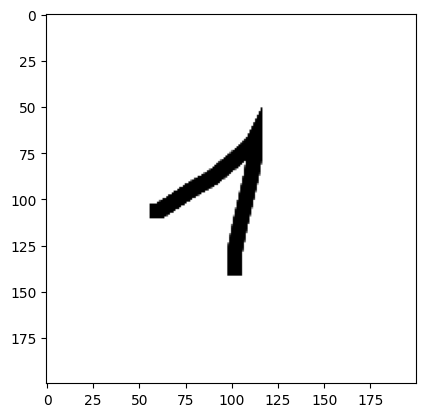

In [8]:
image = image_path[35678][0]  # Image path from the 3rd entry
img = Image.open(image).convert('L')  # Open the image and convert to grayscale

plt.imshow(img, cmap='gray')
plt.show()

In [9]:
print("x : ", x[:,1])
print("y ", y[:10])

x :  [0.30980393 0.30980393 0.30980393 ... 1.         1.         1.        ]
y  [['digit_0']
 ['digit_0']
 ['digit_0']
 ['digit_0']
 ['digit_0']
 ['digit_0']
 ['digit_0']
 ['digit_0']
 ['digit_0']
 ['digit_0']]


In [ ]:
layer1 = Dense(128, activation = 'relu')
layer2 = Dense(64, activation = 'relu')
layer3 = Dense(10, activation = 'linear')

model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)

w1, b1 = layer1.get_weights()
w2, b2 = layer2.get_weights()
w3, b3 = layer3.get_weights()

print(f" Weight of 1st layer ; {w1}, Bias of 1st layer : {b1}")
print(f" Weight of 1st layer ; {w2}, Bias of 1st layer : {b2}")
print(f" Weight of 1st layer ; {w3}, Bias of 1st layer : {b3}")

In [ ]:
model.summary()

In [ ]:
l1 = 1 * 128 + 128
l2 = 128 * 64 + 64
l3 = 64 * 10 + 10

print("L1 : ", {l1})
print("L2 : ", {l2})
print("L3 : ", {l3})

In [10]:
# formula =  ezi / ∑jezj

def softmax(z):
    ez = np.exp(z)
    sum = ez / np.sum(ez)
    return sum

a = softmax(x)
print("a ", a)

b = tf.nn.softmax(x)
print("b ", b)

a  [[1.8559353e-09 1.1234766e-09 9.4913954e-10 ... 8.2741042e-10
  8.2417206e-10 1.6760301e-09]
 [1.8559353e-09 1.1234766e-09 9.4913954e-10 ... 8.2741042e-10
  8.2417206e-10 1.6760301e-09]
 [1.8559353e-09 1.1234766e-09 9.4913954e-10 ... 8.2741042e-10
  8.2417206e-10 1.6760301e-09]
 ...
 [2.2403319e-09 2.2403319e-09 2.2403319e-09 ... 2.2403319e-09
  2.2403319e-09 2.2403319e-09]
 [2.2403319e-09 2.2403319e-09 2.2403319e-09 ... 2.2403319e-09
  2.2403319e-09 2.2403319e-09]
 [2.2403319e-09 2.2403319e-09 2.2403319e-09 ... 2.2403319e-09
  2.2403319e-09 2.2403319e-09]]
b  tf.Tensor(
[[0.00132429 0.00080165 0.00067725 ... 0.00059039 0.00058808 0.00119592]
 [0.00132429 0.00080165 0.00067725 ... 0.00059039 0.00058808 0.00119592]
 [0.00132429 0.00080165 0.00067725 ... 0.00059039 0.00058808 0.00119592]
 ...
 [0.0013353  0.0013353  0.0013353  ... 0.0013353  0.0013353  0.0013353 ]
 [0.0013353  0.0013353  0.0013353  ... 0.0013353  0.0013353  0.0013353 ]
 [0.0013353  0.0013353  0.0013353  ... 0.0013353 

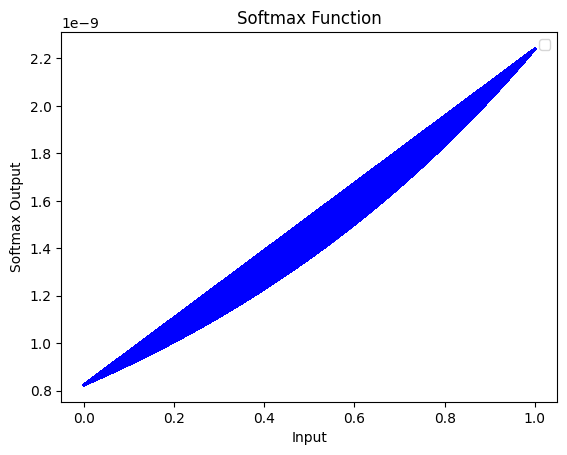

[[1.8559353e-09 1.1234766e-09 9.4913954e-10 ... 8.2741042e-10
  8.2417206e-10 1.6760301e-09]
 [1.8559353e-09 1.1234766e-09 9.4913954e-10 ... 8.2741042e-10
  8.2417206e-10 1.6760301e-09]
 [1.8559353e-09 1.1234766e-09 9.4913954e-10 ... 8.2741042e-10
  8.2417206e-10 1.6760301e-09]
 ...
 [2.2403319e-09 2.2403319e-09 2.2403319e-09 ... 2.2403319e-09
  2.2403319e-09 2.2403319e-09]
 [2.2403319e-09 2.2403319e-09 2.2403319e-09 ... 2.2403319e-09
  2.2403319e-09 2.2403319e-09]
 [2.2403319e-09 2.2403319e-09 2.2403319e-09 ... 2.2403319e-09
  2.2403319e-09 2.2403319e-09]]


In [12]:
def plt_softmax(x_values):

    softmax_values = softmax(x_values)

    plt.plot(x_values, softmax_values, color='blue')
    plt.title("Softmax Function")
    plt.xlabel("Input")
    plt.ylabel("Softmax Output")
    plt.legend(loc='upper right')
    plt.show()

    return softmax_values

softmax = plt_softmax(x)
print(softmax)

In [31]:
model2 = Sequential([
    # take input as the size of pixel.
    # we can't give as (784, 1) -> 2D vector not a flatten image
    tf.keras.Input(shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'linear')
])

model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
l1 = 784 * 128 + 128
l2 = 128 * 64 + 64
l3 = 64 * 10 + 10

print("L1 : ", {l1})
print("L2 : ", {l2})
print("L3 : ", {l3})

L1 :  {100480}
L2 :  {8256}
L3 :  {650}


In [33]:
model.layers

[<Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [36]:
[layer1, layer2, layer3] = model.layers

w1, b1 = layer1.get_weights()
w2, b2 = layer2.get_weights()
w3, b3 = layer3.get_weights()

print(f"W1 shape : {w1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape : {w2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape : {w3.shape}, b3 shape = {b3.shape}")

W1 shape : (784, 128), b1 shape = (128,)
W2 shape : (128, 64), b2 shape = (64,)
W3 shape : (64, 10), b3 shape = (10,)


In [38]:
layer4 = model.layers[0]
layer5 = model.layers[1]
layer6 = model.layers[2]

w4, b4 = layer4.get_weights()
w5, b5 = layer5.get_weights()
w6, b6 = layer6.get_weights()

print(f"W1 shape : {w4.shape}, b1 shape = {b4.shape}")
print(f"W2 shape : {w5.shape}, b2 shape = {b5.shape}")
print(f"W3 shape : {w6.shape}, b3 shape = {b6.shape}")

W1 shape : (784, 128), b1 shape = (128,)
W2 shape : (128, 64), b2 shape = (64,)
W3 shape : (64, 10), b3 shape = (10,)


In [44]:
print(model.layers[0].get_weights())

[array([[-0.02909409,  0.00254153,  0.05546004, ...,  0.02239098,
         0.01282147,  0.07778852],
       [ 0.03594274, -0.05483733,  0.02559467, ...,  0.06074179,
         0.06666899,  0.01053084],
       [-0.07146829, -0.07202681, -0.03333155, ...,  0.0548796 ,
         0.00077382, -0.03543419],
       ...,
       [-0.0735079 ,  0.05829684,  0.01683559, ...,  0.01441394,
         0.02471491,  0.04196684],
       [-0.04927198,  0.06803728,  0.03397413, ..., -0.04864979,
        -0.06046324,  0.01482189],
       [-0.05044929, -0.00421886,  0.04593163, ..., -0.02728284,
        -0.07436843,  0.04727856]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [76]:
print(x.dtype)
print(y.dtype)
print(y.shape)

float32
<U7
(608493, 1)
(608493,)
<U7


In [81]:
# we have y datatype as str so we have to convert it to int.
# two ways to convert it to int format

# 1st way

# flatten the image to 1D array
y1 = y.flatten()

y_int = []

for label in y1:
    
    label_parts = label.split('_')
    
    # from 'digit_0' - it will pick '0'
    numeric = label_parts[1]
    numeric_int = (int)(numeric)
    y_int.append(numeric_int)

y_int = np.array(y_int)
print(y_int.dtype)
print(y_int.shape)

int64
(608493,)


In [79]:
y_int1 = []

# here y is 2d numpy array
for label1 in y:

    # directly took the first string inside the subarray [['digit_0']] - taken 'digit_0'
    label_str1 = label[0]
    label_parts1 = label_str1.split('_')
    numeric1 = label_parts1[1]
    numeric_int1 = (int)(numeric1)
    y_int1.append(numeric_int1)

y_int1 = np.array(y_int1)
print(y_int1.dtype)
print(y_int1.shape)

int64
(608493,)


In [85]:
# in order to fit the data it must be float or int - that's why the above steps are done

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),)

history = model.fit(x,y_int,epochs = 20)

Epoch 1/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 0.1644
Epoch 2/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.1226
Epoch 3/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 0.1109
Epoch 4/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0945
Epoch 5/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0868
Epoch 6/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0756
Epoch 7/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0657
Epoch 8/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0634
Epoch 9/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0526
Epoch 10/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0580
Epoch 11/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0531
Epoch 12/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0505
Epoch 13/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.0473
Epoch 14/20
19016/19016 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - 

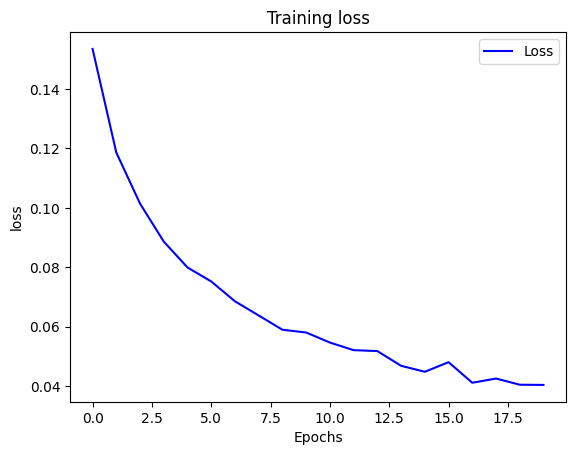

In [88]:
epochs = 20
def plt_loss(history):

    loss_values = history.history['loss']
    plt.plot(range(len(loss_values)), loss_values, label='Loss', color='blue')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

plt.close('all')
plt_loss(history)

In [100]:
pred = x[60849]

prediction = model.predict(pred.reshape(1, 784))

print(f" predicting: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
 predicting: 
[[-1.3534744  10.265803   -0.56298596 -4.8064823   0.9584677  -2.4716268
  -0.9078806  -8.866352   -7.7321315  -4.5579796 ]]
 Largest Prediction index: 1


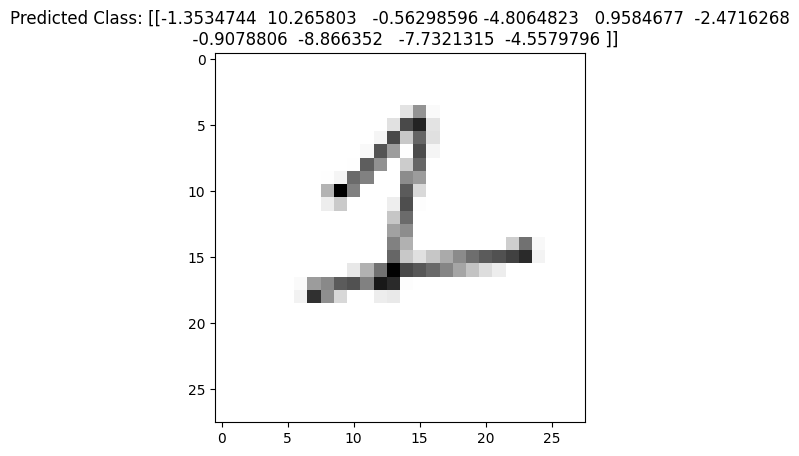

In [101]:
plt.imshow(pred.reshape(28, 28), cmap='gray')  # Reshape back to (20x20) for display
plt.title(f"Predicted Class: {prediction}")
plt.show()
